In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("poe2_essence_simulation_results.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   initial_exalted_costs     1000000 non-null  float64
 1   initial_minor_essences    1000000 non-null  int64  
 2   final_simulations         1000000 non-null  int64  
 3   remaining_minor_essences  1000000 non-null  object 
 4   major_essences            1000000 non-null  object 
 5   major_essence_value       1000000 non-null  float64
 6   minor_essence_value       1000000 non-null  float64
 7   total_values              1000000 non-null  float64
 8   profits                   1000000 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 68.7+ MB


In [3]:
df.head()

,initial_exalted_costs,initial_minor_essences,final_simulations,remaining_minor_essences,major_essences,major_essence_value,minor_essence_value,total_values,profits
0,1304.347826,3000,1418,"{'Body': 2, 'Mind': 2, 'Enhancement': 1, 'Infi...","{'Enhancement': 1, 'Body': 6, 'Mind': 6, 'Ruin...",567.7,493.0,1060.7,-243.647826
1,1304.347826,3000,1406,"{'Body': 1, 'Mind': 1, 'Enhancement': 1, 'Infi...","{'Mind': 5, 'Infinite': 1, 'Ice': 6, 'Haste': ...",1200.5,625.5,1826.0,521.652174
2,1304.347826,3000,1405,"{'Body': 1, 'Mind': 0, 'Enhancement': 1, 'Infi...","{'Haste': 2, 'Battle': 1, 'Flames': 5, 'Infini...",1153.8,642.0,1795.8,491.452174
3,1304.347826,3000,1416,"{'Body': 0, 'Mind': 0, 'Enhancement': 0, 'Infi...","{'Enhancement': 2, 'Ice': 7, 'Mind': 6, 'Flame...",990.3,516.0,1506.3,201.952174
4,1304.347826,3000,1415,"{'Body': 1, 'Mind': 0, 'Enhancement': 1, 'Infi...","{'Electricity': 1, 'Battle': 1, 'Flames': 4, '...",1063.9,534.5,1598.4,294.052174


In [4]:
# Compute Metrics
total_simulations = len(df)
avg_profit = df["profits"].mean()
std_profit = df["profits"].std()
sharpe_ratio = avg_profit / std_profit if std_profit != 0 else np.nan
win_rate = (df["profits"] > 0).mean() * 100
roi = (df["profits"].sum() / df["initial_exalted_costs"].sum()) * 100
print(f"total_simulations: {total_simulations}")
print(f"avg_profit: {avg_profit}")
print(f"std_profit: {std_profit}")
print(f"sharpe_ratio: {sharpe_ratio}")
print(f"win_rate: {win_rate}")
print(f"roi: {roi}")

total_simulations: 1000000
avg_profit: 385.478384413043
std_profit: 310.2139298889393
sharpe_ratio: 1.2426211310080415
win_rate: 90.20230000000001
roi: 29.553342804999964


In [5]:
profitable_attempts = len(df[df['profits'] > 0])
losing_attempts = len(df[df['profits'] < 0])

total_attempts = len(df)

# Calculate the probabilities
probability_of_profit = profitable_attempts / total_attempts
probability_of_loss = losing_attempts / total_attempts

# Calculate the average loss (only for negative profits)
average_loss = df[df['profits'] < 0]['profits'].mean()

print(f"Average Profit: {avg_profit:.4f}")
print(f"Average Loss: {average_loss:.4f}")
print(f"Probability of Profit: {probability_of_profit:.4f}")
print(f"Probability of Loss: {probability_of_loss:.4f}")

# Calculate Expected Value (EV)
EV = (avg_profit * probability_of_profit) - (average_loss * probability_of_loss)

# Print the result
print(f"Expected Value (EV): {EV:.2f} Exalted")


Average Profit: 385.4784
Average Loss: -111.9549
Probability of Profit: 0.9020
Probability of Loss: 0.0980
Expected Value (EV): 358.68 Exalted


In [6]:
probability_of_loss*100

9.797699999999999

In [7]:
probability_of_profit/probability_of_loss

9.206477030323445

In [8]:
import numpy as np
import scipy.stats as stats

profits = df['profits']

mean_profit = np.mean(profits)

std_dev = np.std(profits, ddof=1)

n = len(profits)

se = std_dev / np.sqrt(n)

confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

margin_of_error = z_score * se

lower_bound = mean_profit - margin_of_error
upper_bound = mean_profit + margin_of_error

print(f"Average profit per attempt: {mean_profit:.2f} Exalted")
print(f"95% Confidence Interval: {lower_bound:.2f} to {upper_bound:.2f} Exalted")


Average profit per attempt: 385.48 Exalted
95% Confidence Interval: 384.87 to 386.09 Exalted


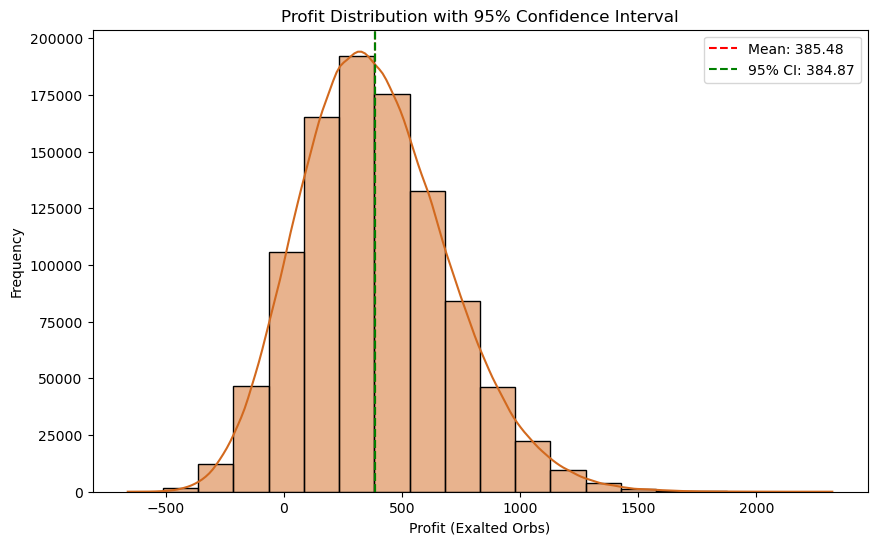

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(profits, color='chocolate',kde=True, bins=20)
plt.axvline(mean_profit, color='red', linestyle='--', label=f'Mean: {mean_profit:.2f}')
plt.axvline(lower_bound, color='green', linestyle='--', label=f'95% CI: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--')
plt.title('Profit Distribution with 95% Confidence Interval')
plt.xlabel('Profit (Exalted Orbs)')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [10]:
# Calculate the 5th percentile (VaR at 95% confidence level)
var_95 = np.percentile(df['profits'], 5)
print(f"Value at Risk (VaR) at 95% confidence: {var_95:.2f}")

Value at Risk (VaR) at 95% confidence: -86.85


In [11]:
major_essence_prices = {
    "Body": 2.7, 
    "Mind": 26, 
    "Enhancement": 13.5,
    "Infinite": 86, 
    "Flames": 3.5, 
    "Ice": 5.6,
    "Electricity": 55, 
    "Torment": 58, 
    "Battle": 8.5,
    "Sorcery": 60, 
    "Ruin": 6, 
    "Haste": 186
}

minor_essence_prices = {
    "Electricity": 5, 
    "Haste": 1.5,
    "Body": 0.5, 
    "Mind": 0.5, 
    "Enhancement": 0.5,
    "Infinite": 0.5, 
    "Flames": 0.5, 
    "Ice": 0.5,
    "Torment": 0.5, 
    "Battle": 0.5,
    "Sorcery": 0.5, 
    "Ruin": 0.5 
}

# Function to calculate value contribution for each row
def calculate_value_contribution(row):
    total_value = 0
    major_essence_contributions = {}
    minor_essence_contributions = {}

    # Calculate value contribution for major essences
    for essence, quantity in row['major_essences'].items():
        if essence in major_essence_prices:
            total_value += major_essence_prices[essence] * quantity
            major_essence_contributions[essence] = major_essence_prices[essence] * quantity 

    # Calculate value contribution for minor essences
    for essence, quantity in row['remaining_minor_essences'].items():
        if essence in minor_essence_prices:
            total_value += minor_essence_prices[essence] * quantity
            minor_essence_contributions[essence] = minor_essence_prices[essence] * quantity

    # Compute contribution percentages
    major_essence_percentages = {essence: round(value / total_value * 100, 2) for essence, value in major_essence_contributions.items()}
    minor_essence_percentages = {essence: round(value / total_value * 100, 2) for essence, value in minor_essence_contributions.items()}

    return major_essence_contributions, minor_essence_contributions, major_essence_percentages, minor_essence_percentages

import ast

# Convert string dictionaries into actual dictionaries
df['remaining_minor_essences'] = df['remaining_minor_essences'].apply(ast.literal_eval)
df['major_essences'] = df['major_essences'].apply(ast.literal_eval)

# Apply function to each row
df[['major_essence_contributions', 'minor_essence_contributions', 'major_essence_percentages', 'minor_essence_percentages']] = pd.DataFrame(df.apply(calculate_value_contribution, axis=1).tolist(), index=df.index)

df.head()

,initial_exalted_costs,initial_minor_essences,final_simulations,remaining_minor_essences,major_essences,major_essence_value,minor_essence_value,total_values,profits,major_essence_contributions,minor_essence_contributions,major_essence_percentages,minor_essence_percentages
0,1304.347826,3000,1418,"{'Body': 2, 'Mind': 2, 'Enhancement': 1, 'Infi...","{'Enhancement': 1, 'Body': 6, 'Mind': 6, 'Ruin...",567.7,493.0,1060.7,-243.647826,"{'Enhancement': 13.5, 'Body': 16.2000000000000...","{'Body': 1.0, 'Mind': 1.0, 'Enhancement': 0.5,...","{'Enhancement': 1.27, 'Body': 1.52, 'Mind': 14...","{'Body': 0.09, 'Mind': 0.09, 'Enhancement': 0...."
1,1304.347826,3000,1406,"{'Body': 1, 'Mind': 1, 'Enhancement': 1, 'Infi...","{'Mind': 5, 'Infinite': 1, 'Ice': 6, 'Haste': ...",1200.5,625.5,1826.0,521.652174,"{'Mind': 130, 'Infinite': 86, 'Ice': 33.599999...","{'Body': 0.5, 'Mind': 0.5, 'Enhancement': 0.5,...","{'Mind': 7.09, 'Infinite': 4.69, 'Ice': 1.83, ...","{'Body': 0.03, 'Mind': 0.03, 'Enhancement': 0...."
2,1304.347826,3000,1405,"{'Body': 1, 'Mind': 0, 'Enhancement': 1, 'Infi...","{'Haste': 2, 'Battle': 1, 'Flames': 5, 'Infini...",1153.8,642.0,1795.8,491.452174,"{'Haste': 372, 'Battle': 8.5, 'Flames': 17.5, ...","{'Body': 0.5, 'Mind': 0.0, 'Enhancement': 0.5,...","{'Haste': 20.67, 'Battle': 0.47, 'Flames': 0.9...","{'Body': 0.03, 'Mind': 0.0, 'Enhancement': 0.0..."
3,1304.347826,3000,1416,"{'Body': 0, 'Mind': 0, 'Enhancement': 0, 'Infi...","{'Enhancement': 2, 'Ice': 7, 'Mind': 6, 'Flame...",990.3,516.0,1506.3,201.952174,"{'Enhancement': 27.0, 'Ice': 39.19999999999999...","{'Body': 0.0, 'Mind': 0.0, 'Enhancement': 0.0,...","{'Enhancement': 1.79, 'Ice': 2.6, 'Mind': 10.3...","{'Body': 0.0, 'Mind': 0.0, 'Enhancement': 0.0,..."
4,1304.347826,3000,1415,"{'Body': 1, 'Mind': 0, 'Enhancement': 1, 'Infi...","{'Electricity': 1, 'Battle': 1, 'Flames': 4, '...",1063.9,534.5,1598.4,294.052174,"{'Electricity': 55, 'Battle': 8.5, 'Flames': 1...","{'Body': 0.5, 'Mind': 0.0, 'Enhancement': 0.5,...","{'Electricity': 3.43, 'Battle': 0.53, 'Flames'...","{'Body': 0.03, 'Mind': 0.0, 'Enhancement': 0.0..."


In [ ]:
import pandas as pd

# Function to calculate combined essence contributions
def calculate_essence_contributions(row):
    total_value = 0
    essence_contributions = {}

    # Process major essences
    for essence, quantity in row['major_essences'].items():
        if essence in major_essence_prices:
            value = major_essence_prices[essence] * quantity
            essence_contributions['Major_' + essence] = {"value": value}
            total_value += value  

    # Process minor essences
    for essence, quantity in row['remaining_minor_essences'].items():
        if essence in minor_essence_prices:
            value = minor_essence_prices[essence] * quantity
            essence_contributions['Minor_' + essence] = {"value": value}
            total_value += value  

    # Avoid division by zero
    if total_value == 0:
        return essence_contributions
    
    # print(essence_contributions)

    # Compute percentages within the same dictionary
    for essence in essence_contributions:
        essence_contributions[essence]["percentage"] = round(essence_contributions[essence]["value"] / total_value * 100, 2)

    return essence_contributions

df['essence_contributions'] = df.apply(calculate_essence_contributions, axis=1)
df['top_contributor'] = df['essence_contributions'].apply(lambda x: max(x, key=lambda k: x[k]['value']) if x else None)

# Show results
df[['remaining_minor_essences','major_essences','essence_contributions', 'top_contributor']].head()


,remaining_minor_essences,major_essences,essence_contributions,top_contributor
0,"{'Body': 2, 'Mind': 2, 'Enhancement': 1, 'Infi...","{'Enhancement': 1, 'Body': 6, 'Mind': 6, 'Ruin...","{'Major_Enhancement': {'value': 13.5, 'percent...",Minor_Electricity
1,"{'Body': 1, 'Mind': 1, 'Enhancement': 1, 'Infi...","{'Mind': 5, 'Infinite': 1, 'Ice': 6, 'Haste': ...","{'Major_Mind': {'value': 130, 'percentage': 7....",Minor_Electricity
2,"{'Body': 1, 'Mind': 0, 'Enhancement': 1, 'Infi...","{'Haste': 2, 'Battle': 1, 'Flames': 5, 'Infini...","{'Major_Haste': {'value': 372, 'percentage': 2...",Minor_Electricity
3,"{'Body': 0, 'Mind': 0, 'Enhancement': 0, 'Infi...","{'Enhancement': 2, 'Ice': 7, 'Mind': 6, 'Flame...","{'Major_Enhancement': {'value': 27.0, 'percent...",Minor_Electricity
4,"{'Body': 1, 'Mind': 0, 'Enhancement': 1, 'Infi...","{'Electricity': 1, 'Battle': 1, 'Flames': 4, '...","{'Major_Electricity': {'value': 55, 'percentag...",Minor_Electricity


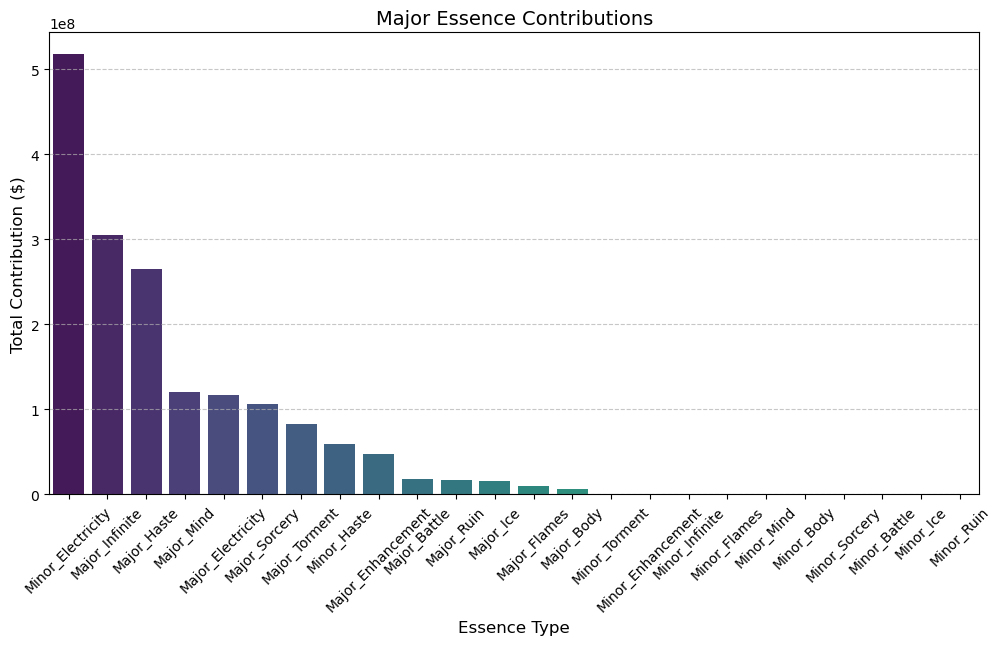

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate contributions across all rows
essence_totals = {}

for contributions in df['essence_contributions']:
    for essence, data in contributions.items():
        essence_totals[essence] = essence_totals.get(essence, 0) + data["value"]

# Sort essences by total contribution (descending)
essence_totals = dict(sorted(essence_totals.items(), key=lambda x: x[1], reverse=True))

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=list(essence_totals.keys()), y=list(essence_totals.values()), palette="viridis")

# Customize labels and title
plt.xlabel("Essence Type", fontsize=12)
plt.ylabel("Total Contribution ($)", fontsize=12)
plt.title("Major Essence Contributions", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [14]:
import pandas as pd

total_value = sum(essence_totals.values())
df_essence = pd.DataFrame([
    {"Essence": essence, "Value": value, "Percentage": (value / total_value) * 100}
    for essence, value in essence_totals.items()
])
df_essence = df_essence.sort_values(by="Percentage", ascending=False)

print(df_essence.to_string(index=False)) 

          Essence        Value  Percentage
Minor_Electricity 5.175402e+08   30.532735
   Major_Infinite 3.055676e+08   18.027228
      Major_Haste 2.646799e+08   15.615019
       Major_Mind 1.202386e+08    7.093578
Major_Electricity 1.173138e+08    6.921032
    Major_Sorcery 1.068450e+08    6.303414
    Major_Torment 8.251851e+07    4.868252
      Minor_Haste 5.921979e+07    3.493723
Major_Enhancement 4.804153e+07    2.834252
     Major_Battle 1.816623e+07    1.071732
       Major_Ruin 1.707283e+07    1.007226
        Major_Ice 1.594765e+07    0.940845
     Major_Flames 9.957434e+06    0.587447
       Major_Body 6.717136e+06    0.396283
    Minor_Torment 5.212455e+05    0.030751
Minor_Enhancement 5.211080e+05    0.030743
   Minor_Infinite 5.210960e+05    0.030743
     Minor_Flames 5.210480e+05    0.030740
       Minor_Mind 5.208065e+05    0.030725
       Minor_Body 5.207010e+05    0.030719
    Minor_Sorcery 5.206930e+05    0.030719
     Minor_Battle 5.205725e+05    0.030712
        Min